In [152]:
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import investpy as ivpy
import matplotlib.pyplot as plt

## Use the same random seed for reproducibility
np.random.seed(121)
from_date='01/06/2023'
to_date='01/07/2024'

In [137]:
# ivpy.get_indices('india')
# ivpy.search_indices('symbol', 'nifty')
market = ivpy.get_index_historical_data(index="nifty 500", country='india', from_date=from_date, to_date=to_date)
market.to_csv('NIFTY500_01_06_2023_to_01_07_2024', index=True)

ConnectionError: ERR#0015: error 403, try again later.

In [138]:
stock = ivpy.get_stock_historical_data(stock='RELI', country='India', from_date=from_date, to_date=to_date)
stock.to_csv('RELI_01_06_2023_to_01_07_2024', index=True)

ConnectionError: ERR#0015: error 403, try again later.

In [146]:
# 10 year bonds as riskfree_rate is the proxy for risk free rate.
riskfree_rate = ivpy.get_bond_historical_data(bond='India 10Y', from_date=from_date, to_date=to_date, as_json=False, interval='Daily')
riskfree_rate.to_csv('bonds_India_10Y_01_06_2023_to_01_07_2024.csv', index=True)

ConnectionError: ERR#0015: error 403, try again later.

In [169]:
stock.info()
market.info()
riskfree_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2023-06-01 to 2024-07-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      269 non-null    float64
 1   High      269 non-null    float64
 2   Low       269 non-null    float64
 3   Close     269 non-null    float64
 4   Volume    269 non-null    int64  
 5   Currency  269 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 14.7+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2023-06-01 to 2024-07-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      269 non-null    float64
 1   High      269 non-null    float64
 2   Low       269 non-null    float64
 3   Close     269 non-null    float64
 4   Volume    269 non-null    int64  
 5   Currency  269 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 22.8+ KB
<cla

In [204]:
# Initialise a df.
daily_returns = pd.DataFrame()

# Daily returns are based on closing prices.
daily_returns['stock_pct_returns'] = stock['Close'].pct_change(1)
daily_returns['stock_log_returns'] = np.log(stock['Close'] / stock['Close'].shift(1))
daily_returns['market_pct_returns'] = market['Close'].pct_change(1)
daily_returns['market_log_returns'] = np.log(market['Close'] / market['Close'].shift(1))

# Compounded daily risk free rate based on 360 days for the calendar year used in the bond market.
daily_returns['rf_rate'] = (1 + riskfree_rate['Close']) ** (1/360) - 1

In [132]:
daily_returns.to_csv("daily_returns_working_data", index=True)

In [205]:
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2023-06-01 to 2024-07-01
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stock_pct_returns   268 non-null    float64
 1   stock_log_returns   268 non-null    float64
 2   market_pct_returns  268 non-null    float64
 3   market_log_returns  268 non-null    float64
 4   rf_rate             260 non-null    float64
dtypes: float64(5)
memory usage: 12.6 KB


In [206]:
# We need to check for missing data.
## riskfree_rate.index.difference(market.index) ## This is fine.

## The riskfree_rate df is missing some data.
market.index.difference(riskfree_rate.index)

DatetimeIndex(['2023-08-16', '2023-11-12', '2024-01-20', '2024-02-19',
               '2024-03-02', '2024-04-01', '2024-04-09', '2024-05-18',
               '2024-05-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [207]:
# Fill rows with previous day's risk-free rate since daily rates are generally stable.
daily_returns = daily_returns.ffill()
daily_returns.info()
daily_returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2023-06-01 to 2024-07-01
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stock_pct_returns   268 non-null    float64
 1   stock_log_returns   268 non-null    float64
 2   market_pct_returns  268 non-null    float64
 3   market_log_returns  268 non-null    float64
 4   rf_rate             269 non-null    float64
dtypes: float64(5)
memory usage: 12.6 KB


,stock_pct_returns,stock_log_returns,market_pct_returns,market_log_returns,rf_rate
Date,,,,,
2023-06-01,NaN,NaN,NaN,NaN,0.005786
2023-06-02,-0.003264,-0.003270,0.003226,0.003221,0.005787
2023-06-05,0.008977,0.008937,0.003055,0.003050,0.005792
2023-06-06,0.000849,0.000849,0.001192,0.001191,0.005785
2023-06-07,0.007584,0.007555,0.008080,0.008048,0.005787
...,...,...,...,...,...
2024-06-25,0.008793,0.008755,0.003659,0.003652,0.005787
2024-06-26,0.041175,0.040350,0.002957,0.002953,0.005792
2024-06-27,0.010915,0.010855,0.004484,0.004474,0.005793


In [208]:
# Drop NaNs from first row as return calculations are based on previous day's closing price.
daily_returns = daily_returns.dropna()

daily_returns.isnull().sum() # Check for null values.
daily_returns.info()
daily_returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2023-06-02 to 2024-07-01
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stock_pct_returns   268 non-null    float64
 1   stock_log_returns   268 non-null    float64
 2   market_pct_returns  268 non-null    float64
 3   market_log_returns  268 non-null    float64
 4   rf_rate             268 non-null    float64
dtypes: float64(5)
memory usage: 12.6 KB


,stock_pct_returns,stock_log_returns,market_pct_returns,market_log_returns,rf_rate
Date,,,,,
2023-06-02,-0.003264,-0.003270,0.003226,0.003221,0.005787
2023-06-05,0.008977,0.008937,0.003055,0.003050,0.005792
2023-06-06,0.000849,0.000849,0.001192,0.001191,0.005785
2023-06-07,0.007584,0.007555,0.008080,0.008048,0.005787
2023-06-08,0.000600,0.000599,-0.005351,-0.005365,0.005800
...,...,...,...,...,...
2024-06-25,0.008793,0.008755,0.003659,0.003652,0.005787
2024-06-26,0.041175,0.040350,0.002957,0.002953,0.005792
2024-06-27,0.010915,0.010855,0.004484,0.004474,0.005793


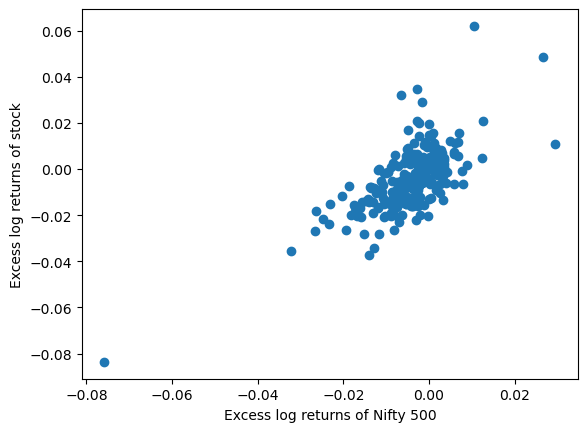

(Text(0.5, 0, 'Excess log returns of stock.'),
 Text(0, 0.5, 'Probability density'))

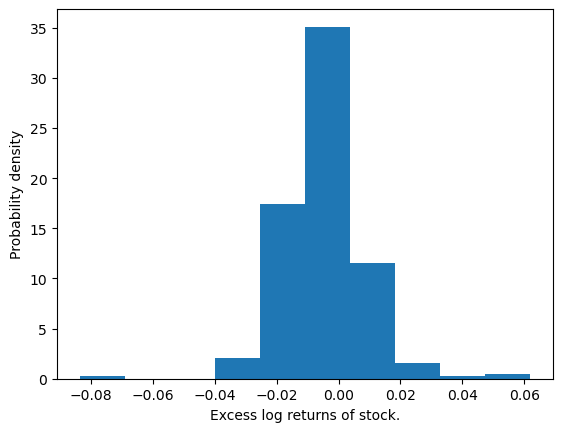

In [218]:
x = daily_returns['market_log_returns'] - daily_returns['rf_rate'] # Daily market log returns in excess of the rf_rate.
y = daily_returns['stock_log_returns'] - daily_returns['rf_rate'] # Daily stock log returns in excess of rf_rate.


plt.scatter(x,y) # Plot of the excess log returns.
plt.xlabel('Excess log returns of Nifty 500'), plt.ylabel('Excess log returns of stock')
plt.show()


plt.hist(y, density=True) # Histogram of excess returns during the period.
plt.xlabel('Excess log returns of stock.'), plt.ylabel('Probability density')

In [219]:
# Analyze daily returns of all securities.
daily_returns.describe()

,stock_pct_returns,stock_log_returns,market_pct_returns,market_log_returns,rf_rate
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.001329,0.001243,0.001402,0.001366,0.005843
std,0.013111,0.013086,0.008387,0.008451,0.000034
min,-0.074851,-0.077801,-0.067602,-0.069996,0.005774
25%,-0.006935,-0.006959,-0.002434,-0.002436,0.005817
50%,0.000981,0.000981,0.002473,0.002470,0.005845
75%,0.008223,0.008190,0.005777,0.005761,0.005864
max,0.070192,0.067838,0.035945,0.035314,0.005925
